In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import cv2
import numpy as np

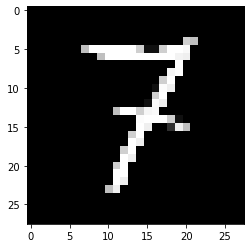

In [5]:
plt.imshow(plt.imread('Num7.png'))


In [6]:
image = cv2.imread("Num7.png")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray.shape

(28, 28)

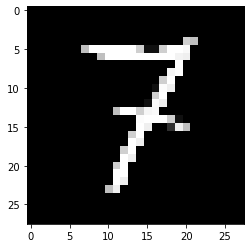

In [4]:
plt.imshow(image)

In [7]:
image.shape

(28, 28, 3)

In [7]:
gray_array = gray.reshape(1, 784)

In [8]:
gray_array[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 207, 191,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0, 191, 255, 255, 255, 255, 255, 255, 207,  16,
        16, 207, 255, 255, 249,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0, 191, 255, 255, 25

In [101]:
df_num = pd.DataFrame(data=gray)

In [102]:
df_num.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# GradientBoostingClassifier

In [10]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
X_train = train_images.reshape(train_images.shape[0], -1)
X_test = test_images.reshape(test_images.shape[0], -1)
model = GradientBoostingClassifier(n_estimators=10, max_depth=5, max_features=0.1)
model.fit(X_train, train_labels)

GradientBoostingClassifier(max_depth=5, max_features=0.1, n_estimators=10)

In [36]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [66]:
model.predict(gray_array)

array([7], dtype=uint8)

# Artificial neural network

In [67]:
from tensorflow.keras import models
from tensorflow.keras import layers
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_shape=(784,)))
network.add(layers.Dense(10, activation='softmax'))
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [68]:
train_vectors = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_vectors = test_images.reshape((10000, 28 * 28)).astype('float32') / 255

In [82]:
train_vectors

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
from tensorflow.keras.utils import to_categorical
train_labels_hot = to_categorical(train_labels)
test_labels_hot = to_categorical(test_labels)

In [70]:
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [71]:
%%time
network.fit(train_vectors, train_labels_hot, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.9144 - val_loss: 0.1298 - val_accuracy: 0.9628
Epoch 2/20
422/422 [==============================] - 1s 2ms/step - loss: 0.1370 - accuracy: 0.9606 - val_loss: 0.1043 - val_accuracy: 0.9683
Epoch 3/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0934 - accuracy: 0.9723 - val_loss: 0.0842 - val_accuracy: 0.9750
Epoch 4/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9798 - val_loss: 0.0743 - val_accuracy: 0.9788
Epoch 5/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0553 - accuracy: 0.9834 - val_loss: 0.0719 - val_accuracy: 0.9782
Epoch 6/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0680 - val_accuracy: 0.9808
Epoch 7/20
422/422 [==============================] - 1s 2ms/step - loss: 0.0356 - accuracy: 0.9897 - val_loss: 0.0693 - val_accuracy: 0.9800
Epoch 

In [237]:
num_test = gray_array.reshape((1, 28 * 28)).astype('float32') / 255

In [238]:
num_test

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [239]:
np.argmax(network.predict(num_test), axis=-1)

array([7], dtype=int64)

# CNN

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [11]:
train_images.shape

(60000, 28, 28)

In [12]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [13]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [16]:
model.fit(train_images, train_labels_hot, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 15s 36ms/step - loss: 0.2475 - accuracy: 0.9222 - val_loss: 0.0551 - val_accuracy: 0.9850
Epoch 2/10
422/422 [==============================] - 16s 37ms/step - loss: 0.0569 - accuracy: 0.9825 - val_loss: 0.0545 - val_accuracy: 0.9852
Epoch 3/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0379 - accuracy: 0.9882 - val_loss: 0.0654 - val_accuracy: 0.9803
Epoch 4/10
422/422 [==============================] - 16s 38ms/step - loss: 0.0284 - accuracy: 0.9911 - val_loss: 0.0360 - val_accuracy: 0.9910
Epoch 5/10
422/422 [==============================] - 17s 41ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0321 - val_accuracy: 0.9923
Epoch 6/10
422/422 [==============================] - 18s 42ms/step - loss: 0.0179 - accuracy: 0.9944 - val_loss: 0.0303 - val_accuracy: 0.9917
Epoch 7/10
422/422 [==============================] - 18s 42ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0352 - val_accuracy:

In [4]:
numerinchi = image[:,:,1].reshape((1, 28, 28, 1))
numerinchi = numerinchi.astype('float32') / 255
numerinchi.shape

(1, 28, 28, 1)

In [22]:
train_images.shape

(60000, 28, 28, 1)

In [26]:
res = np.argmax(model.predict(numerinchi), axis=-1)

In [30]:
print(f"The number is {res[0]}")

The number is 7
